# What are the different types of hate crime


In [25]:
import pandas as pd
from pathlib import Path
import re
import numpy as np
import matplotlib.pyplot as plt

# File to Load (Remember to Change These)
hate_crime_data_to_load = Path("Resources/hate_crime.csv")

# Read School and Student Data File and store into Pandas DataFrames
complete_hate_crime_data = pd.read_csv(hate_crime_data_to_load)
complete_hate_crime_data

,incident_id,data_year,ori,pug_agency_name,pub_agency_unit,agency_type_name,state_abbr,state_name,division_name,region_name,...,offender_race,offender_ethnicity,victim_count,offense_name,total_individual_victims,location_name,bias_desc,victim_types,multiple_offense,multiple_bias
0,43,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,Not Specified,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
1,44,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,Not Specified,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S
2,45,1991,AR0600300,North Little Rock,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,Not Specified,2,Aggravated Assault;Murder and Nonnegligent Man...,2.0,Residence/Home,Anti-White,Individual,M,S
3,46,1991,AR0600300,North Little Rock,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,Not Specified,1,Intimidation,1.0,Residence/Home,Anti-White,Individual,S,S
4,47,1991,AR0670000,Sevier,NaN,County,AR,Arkansas,West South Central,South,...,White,Not Specified,1,Intimidation,1.0,School/College,Anti-Black or African American,Individual,S,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241658,1473449,2022,WY0190200,Rock Springs,NaN,City,WY,Wyoming,Mountain,West,...,White,Hispanic or Latino,2,Simple Assault,2.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S
241659,1473450,2022,WY0010200,University of Wyoming,NaN,University or College,WY,Wyoming,Mountain,West,...,White,Not Hispanic or Latino,1,Intimidation,1.0,School-College/University,Anti-Gay (Male),Individual,S,S
241660,1476554,2022,WY0190000,Sweetwater,NaN,County,WY,Wyoming,Mountain,West,...,White,Multiple,2,Simple Assault,2.0,Highway/Road/Alley/Street/Sidewalk,Anti-Hispanic or Latino,Individual,S,S
241661,1476555,2022,WY0110100,Cheyenne,NaN,City,WY,Wyoming,Mountain,West,...,White,Not Hispanic or Latino,1,Intimidation,1.0,Residence/Home,Anti-Black or African American,Individual,S,S


In [26]:
# Reducing columns
clean_complete_hate_crime_dataDF = complete_hate_crime_data[["incident_id", "data_year", "pug_agency_name", "state_abbr", 
                                                   "offense_name", "bias_desc"]]
clean_complete_hate_crime_dataDF

,incident_id,data_year,pug_agency_name,state_abbr,offense_name,bias_desc
0,43,1991,Pine Bluff,AR,Aggravated Assault,Anti-Black or African American
1,44,1991,Pine Bluff,AR,Aggravated Assault;Destruction/Damage/Vandalis...,Anti-White
2,45,1991,North Little Rock,AR,Aggravated Assault;Murder and Nonnegligent Man...,Anti-White
3,46,1991,North Little Rock,AR,Intimidation,Anti-White
4,47,1991,Sevier,AR,Intimidation,Anti-Black or African American
...,...,...,...,...,...,...
241658,1473449,2022,Rock Springs,WY,Simple Assault,Anti-White
241659,1473450,2022,University of Wyoming,WY,Intimidation,Anti-Gay (Male)
241660,1476554,2022,Sweetwater,WY,Simple Assault,Anti-Hispanic or Latino
241661,1476555,2022,Cheyenne,WY,Intimidation,Anti-Black or African American


In [27]:
# Splitting offense names from cleaned data frame
split_offense_name = clean_complete_hate_crime_dataDF["offense_name"].str.split(";", expand=True)
split_offense_name.head(20)

,0,1,2,3,4
0,Aggravated Assault,None,None,None,None
1,Aggravated Assault,Destruction/Damage/Vandalism of Property,None,None,None
2,Aggravated Assault,Murder and Nonnegligent Manslaughter,None,None,None
3,Intimidation,None,None,None,None
4,Intimidation,None,None,None,None
5,Intimidation,None,None,None,None
6,Simple Assault,None,None,None,None
7,Aggravated Assault,None,None,None,None
8,Robbery,None,None,None,None
9,Aggravated Assault,None,None,None,None


In [28]:
# Renaming split table columns by creating dictionary
cleaned_split_offense_name = split_offense_name.rename(columns ={0:"Offense #1", 1:"Offense #2", 2:"Offense #3", 
                                                                 3:"Offense #4", 4:"Offense #5"})
cleaned_split_offense_name

,Offense #1,Offense #2,Offense #3,Offense #4,Offense #5
0,Aggravated Assault,None,None,None,None
1,Aggravated Assault,Destruction/Damage/Vandalism of Property,None,None,None
2,Aggravated Assault,Murder and Nonnegligent Manslaughter,None,None,None
3,Intimidation,None,None,None,None
4,Intimidation,None,None,None,None
...,...,...,...,...,...
241658,Simple Assault,None,None,None,None
241659,Intimidation,None,None,None,None
241660,Simple Assault,None,None,None,None
241661,Intimidation,None,None,None,None


In [29]:
# Combine all offense cols
offense_cols_combined_df = pd.concat([cleaned_split_offense_name["Offense #1"],cleaned_split_offense_name["Offense #2"], cleaned_split_offense_name["Offense #3"],
                    cleaned_split_offense_name["Offense #4"],cleaned_split_offense_name["Offense #5"]])
offense_cols_combined_df

0         Aggravated Assault
1         Aggravated Assault
2         Aggravated Assault
3               Intimidation
4               Intimidation
                 ...        
241658                  None
241659                  None
241660                  None
241661                  None
241662                  None
Length: 1208315, dtype: object

In [30]:
# Get count of top 5 offenses
offense_cols_combined_df.value_counts().head(5)

Destruction/Damage/Vandalism of Property    76692
Intimidation                                74506
Simple Assault                              49158
Aggravated Assault                          27525
Robbery                                      4503
Name: count, dtype: int64

In [31]:
offense_cols_combined_df.nunique()

53

# Data Visualization

In [32]:
# National Data Set - Bar Chart
offenses = ["Destruction/Damage/\nVandalism", "Intimidation", "Simple Assault", "Aggravated Assault", "Robbery"]
occurrences = [76692, 71529, 46651, 27525, 4503]


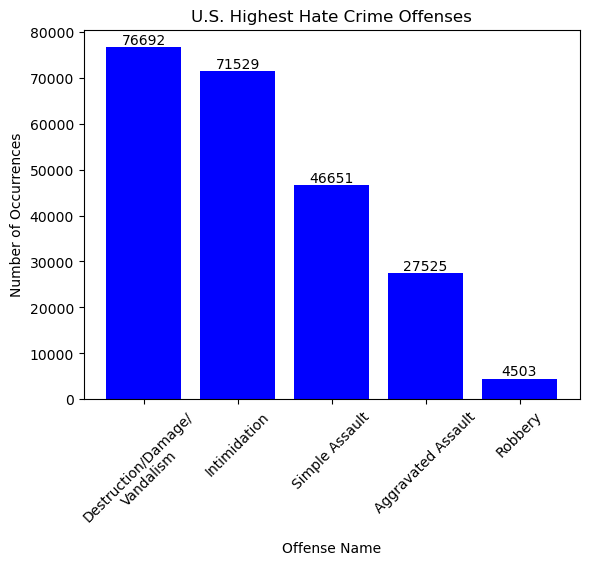

In [33]:
# Create bar chart
x_axis = np.arange(len(offenses))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)
    
fig,ax = plt.subplots()
p = ax.bar(x_axis, occurrences, color="blue")
ax.bar_label(p)

    
ax.set_title("U.S. Highest Hate Crime Offenses")
ax.set_xlabel("Offense Name")
ax.set_ylabel("Number of Occurrences")

# Plot for bar chart
#plt.bar(x_axis, occurrences, color="blue")
#plt.bar_label()
plt.xticks(tick_locations, offenses, rotation=45)
plt.show()

In [34]:
# National Data Set - Pie Chart
offenses = ["Destruction/Damage/\nVandalism", "Intimidation", "Simple Assault", "Aggravated Assault", "Robbery"]
occurrences = [76692, 71529, 46651, 27525, 4503]
colors = ["orange", "red", "gray", "lightskyblue", "pink"]
explode = (0.05, 0, 0, 0, 0)

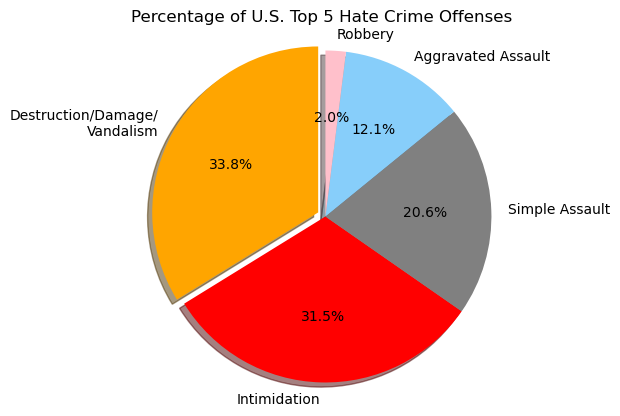

In [35]:
# Create pie chart
plt.title("Percentage of U.S. Top 5 Hate Crime Offenses")
plt.pie(occurrences, explode=explode, labels=offenses, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

plt.axis("equal")
plt.show()